In [4]:
# Imports we will use
import torch
import gc
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Function
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import random
from pathlib import Path
from sklearn.metrics import r2_score
from astropy.visualization import make_lupton_rgb
from sklearn.manifold import Isomap
from train_utils import *
import time
import os
import json

%matplotlib inline
plt.rcParams.update({'font.size': 12})

# Set Seed
torch.manual_seed(22)

# Find if cuda is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## Load Data

In [5]:
# Specify paths, load in data, and subsample labels
head = Path.cwd().parents[1]
source_img_path = head / 'data/mb_lenscolor_source/mb_lenscolor_source.npy'
target_img_path = head / 'data/mb_lenscolor_target/mb_lenscolor_target.npy'
source_meta = head / 'data/mb_lenscolor_source/mb_lenscolor_source_metadata.csv'
target_meta = head / 'data/mb_lenscolor_target/mb_lenscolor_target_metadata.csv'
batch_size = 64
source_train_dataloader, source_test_dataloader, source_val_dataloader, source_data = create_dataloader(source_img_path, source_meta, batch_size)
target_train_dataloader, target_test_dataloader, target_val_dataloader, target_data = create_dataloader(target_img_path, target_meta, batch_size)
isomap_source_label_sample = pd.read_csv(source_meta)['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].tolist()[:1000]
isomap_target_label_sample = pd.read_csv(target_meta)['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].tolist()[:1000]

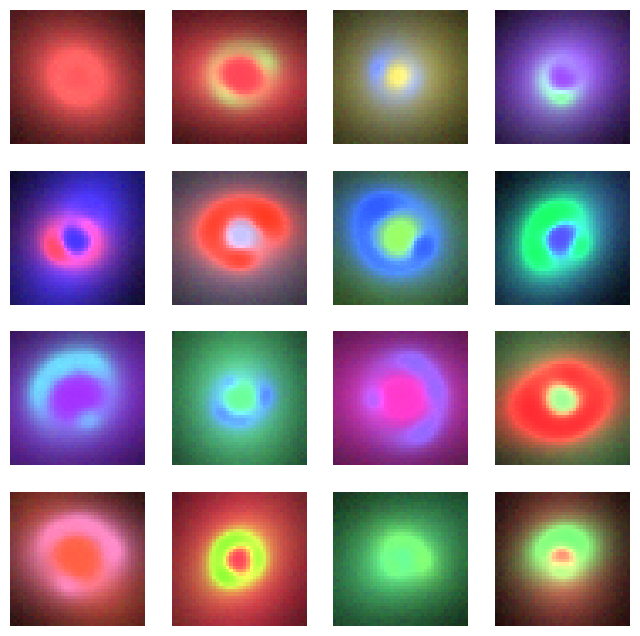

In [6]:
# Visualize source data
visualize_data(source_data)

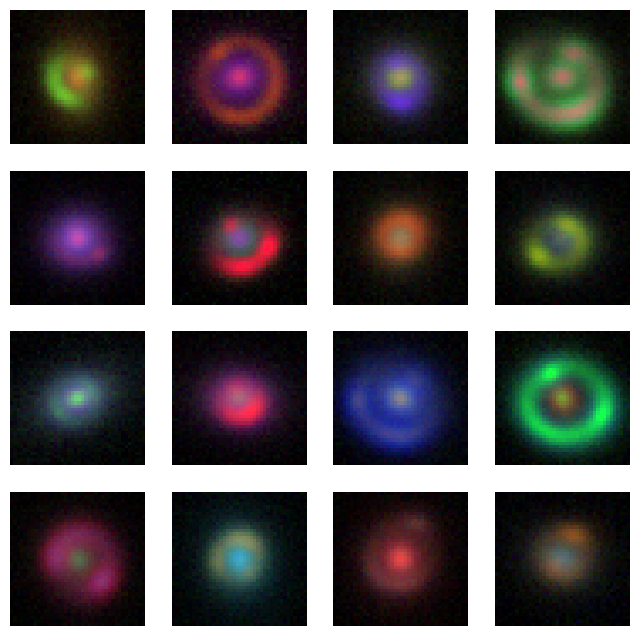

In [7]:
# Visualize target data
visualize_data(target_data)

## Model Setup

In [8]:
# Choose how you prefer to evolve beta and the DA Weight
def da_weight_function(epoch):
    """ Linear evolving DA weighting in loss function. """
    da_weight = init_wt_da - ((init_wt_da - final_wt_da) * (epoch / n_epoch))
    return da_weight

def beta_function(epoch):
    """ Linear evolving beta weighting in loss function until halfway through total epochs. """
    beta_val = beta_init - (beta_init - beta_final) * (epoch / n_epoch)
    return beta_val

# Initialize hyperparameters
learning_rate = 3e-5
n_epoch = 150
init_wt_da = 1.4
final_wt_da = 1.0
beta_init = 1.0
beta_final = 0.4

In [9]:
# Initialize model
model = NeuralNetworkMVE(npix=40).cuda()

# Loss Functions / Optimizers
regressor_loss_fn = nn.MSELoss().cuda()
da_loss_fn = MMD_loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
# To continue training from a past model, enter path into load_mod_name
# Else, enter None, and you still have to run the function.
# Then, enter save_mod_name to save for the current run  

load_mod_name = None # "models/start_code_test_2"
stats, model, optimizer, best_target_R2, best_mve_loss = initialize_state(load_mod_name, model, optimizer)


#save_mod_name = load_mod_name # may overwrite loaded model
save_mod_name = "models/mve_v4_b64_aug4_2330"

## Train

Beginning Training...
Generating Isomap...


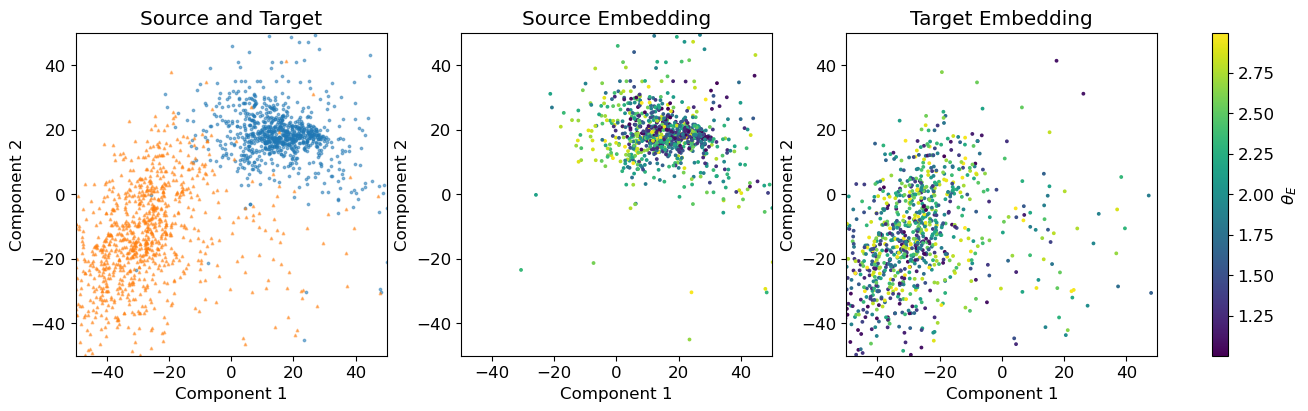


Epoch 0: 12.52s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.3155
	Train Regression Loss: : 1.5881
	Train Mve Loss: : 0.6630
	Train R2 Score: : -3.8758
 Validation Statistics:
	Val Source Regression Loss: : 0.4044
	Val Target Regression Loss: : 0.4190
	Val Source R2 Score: : -0.2330
	Val Target R2 Score: : -0.2946
	Val Source Mve Loss: : 0.0715
	Val Target Mve Loss: : 0.0773
Saving Model... Done.
Saving Model MVE... Done.

Epoch 1: 10.36s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1513
	Train Regression Loss: : 0.2869
	Train Mve Loss: : -0.0185
	Train R2 Score: : 0.1251
 Validation Statistics:
	Val Source Regression Loss: : 0.2338
	Val Target Regression Loss: : 0.2526
	Val Source R2 Score: : 0.2830
	Val Target R2 Score: : 0.2186
	Val Source Mve Loss: : -0.0608
	Val Target Mve Loss: : -0.0510
Saving Model... Done.
Saving Model MVE... Done.

Epoch 2: 12.72s
-------------------------------
 Training Statistics:
	Train Da Loss: :

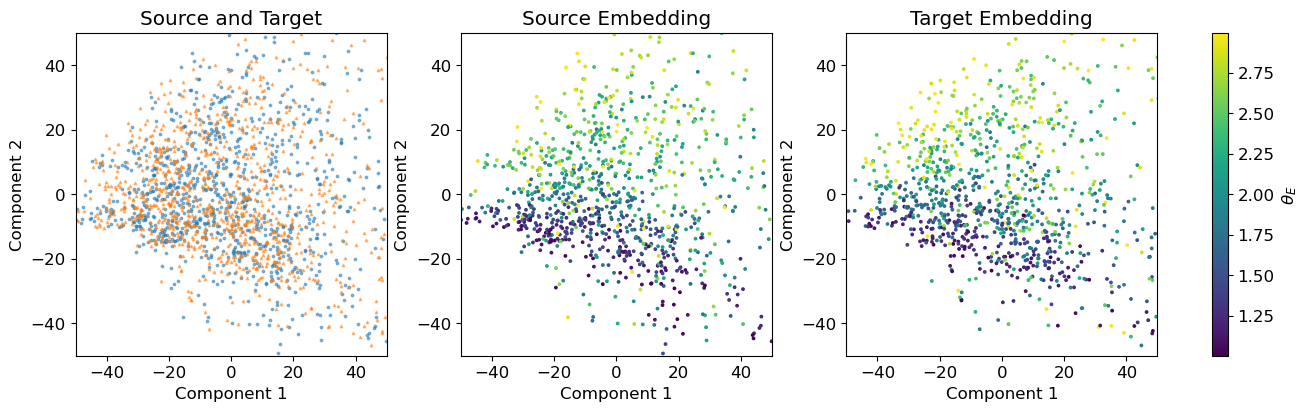

Saving Model... Done.

Epoch 20: 11.87s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0725
	Train Regression Loss: : 0.0270
	Train Mve Loss: : -0.0770
	Train R2 Score: : 0.9172
 Validation Statistics:
	Val Source Regression Loss: : 0.0282
	Val Target Regression Loss: : 0.0309
	Val Source R2 Score: : 0.9120
	Val Target R2 Score: : 0.9044
	Val Source Mve Loss: : -0.0553
	Val Target Mve Loss: : -0.0550
Saving Model... Done.

Epoch 21: 11.97s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0723
	Train Regression Loss: : 0.0263
	Train Mve Loss: : -0.0731
	Train R2 Score: : 0.9193
 Validation Statistics:
	Val Source Regression Loss: : 0.0283
	Val Target Regression Loss: : 0.0311
	Val Source R2 Score: : 0.9141
	Val Target R2 Score: : 0.9040
	Val Source Mve Loss: : -0.1830
	Val Target Mve Loss: : -0.1815
Saving Model MVE... Done.

Epoch 22: 11.91s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0716
	Train Regressi

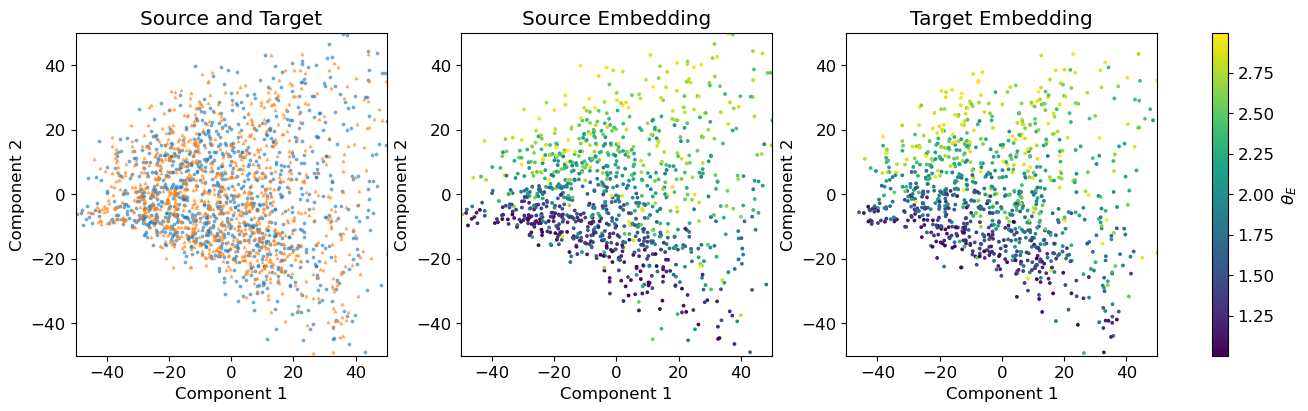

Saving Model... Done.

Epoch 40: 10.35s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0710
	Train Regression Loss: : 0.0212
	Train Mve Loss: : -0.1017
	Train R2 Score: : 0.9349
 Validation Statistics:
	Val Source Regression Loss: : 0.0225
	Val Target Regression Loss: : 0.0253
	Val Source R2 Score: : 0.9312
	Val Target R2 Score: : 0.9165
	Val Source Mve Loss: : -0.0955
	Val Target Mve Loss: : -0.0939

Epoch 41: 9.96s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0705
	Train Regression Loss: : 0.0204
	Train Mve Loss: : -0.0841
	Train R2 Score: : 0.9379
 Validation Statistics:
	Val Source Regression Loss: : 0.0214
	Val Target Regression Loss: : 0.0245
	Val Source R2 Score: : 0.9347
	Val Target R2 Score: : 0.9238
	Val Source Mve Loss: : -0.0748
	Val Target Mve Loss: : -0.0724
Saving Model... Done.

Epoch 42: 10.21s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0711
	Train Regression Loss: : 0.0203
	Train Mv

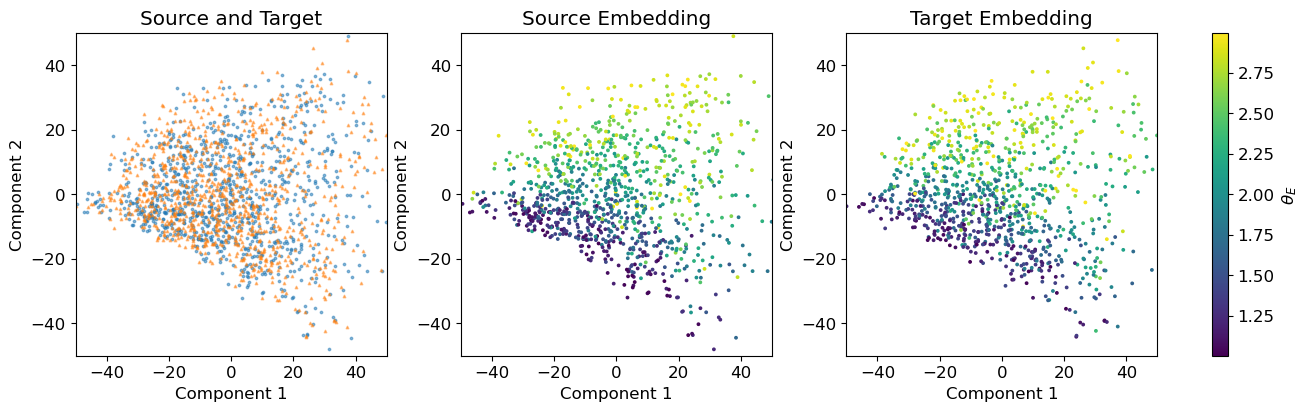


Epoch 60: 12.54s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0700
	Train Regression Loss: : 0.0168
	Train Mve Loss: : -0.1050
	Train R2 Score: : 0.9485
 Validation Statistics:
	Val Source Regression Loss: : 0.0172
	Val Target Regression Loss: : 0.0196
	Val Source R2 Score: : 0.9481
	Val Target R2 Score: : 0.9394
	Val Source Mve Loss: : -0.0827
	Val Target Mve Loss: : -0.0805
Saving Model... Done.

Epoch 61: 10.66s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0715
	Train Regression Loss: : 0.0164
	Train Mve Loss: : -0.1082
	Train R2 Score: : 0.9497
 Validation Statistics:
	Val Source Regression Loss: : 0.0194
	Val Target Regression Loss: : 0.0247
	Val Source R2 Score: : 0.9410
	Val Target R2 Score: : 0.9228
	Val Source Mve Loss: : -0.2248
	Val Target Mve Loss: : -0.2213
Saving Model MVE... Done.

Epoch 62: 9.05s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0710
	Train Regression Loss: : 0.0162
	Trai

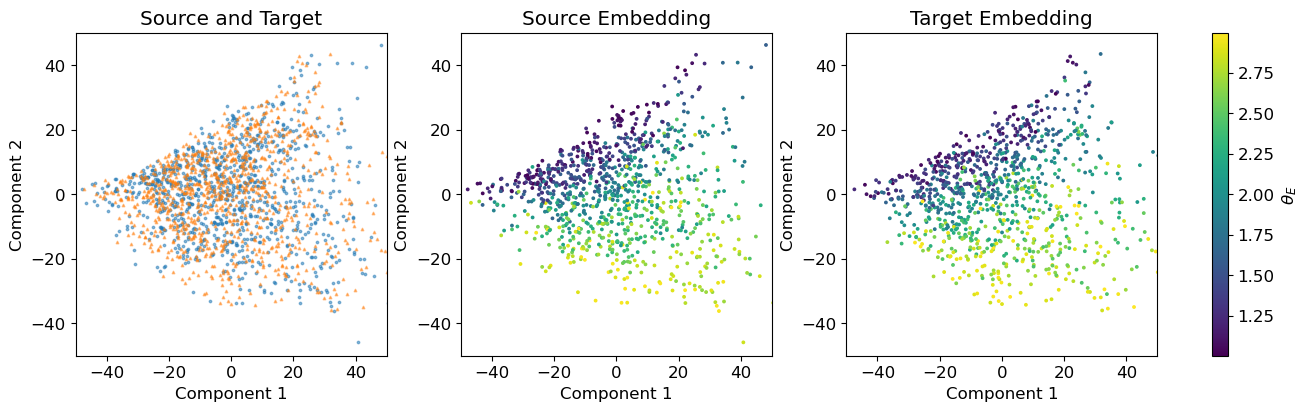

Saving Model... Done.

Epoch 80: 11.34s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0700
	Train Regression Loss: : 0.0143
	Train Mve Loss: : -0.1769
	Train R2 Score: : 0.9560
 Validation Statistics:
	Val Source Regression Loss: : 0.0153
	Val Target Regression Loss: : 0.0182
	Val Source R2 Score: : 0.9534
	Val Target R2 Score: : 0.9437
	Val Source Mve Loss: : -0.2572
	Val Target Mve Loss: : -0.2549
Saving Model... Done.
Saving Model MVE... Done.

Epoch 81: 11.63s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0697
	Train Regression Loss: : 0.0143
	Train Mve Loss: : -0.1988
	Train R2 Score: : 0.9560
 Validation Statistics:
	Val Source Regression Loss: : 0.0152
	Val Target Regression Loss: : 0.0189
	Val Source R2 Score: : 0.9531
	Val Target R2 Score: : 0.9415
	Val Source Mve Loss: : -0.1103
	Val Target Mve Loss: : -0.1040

Epoch 82: 11.88s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0690
	Train Regressi

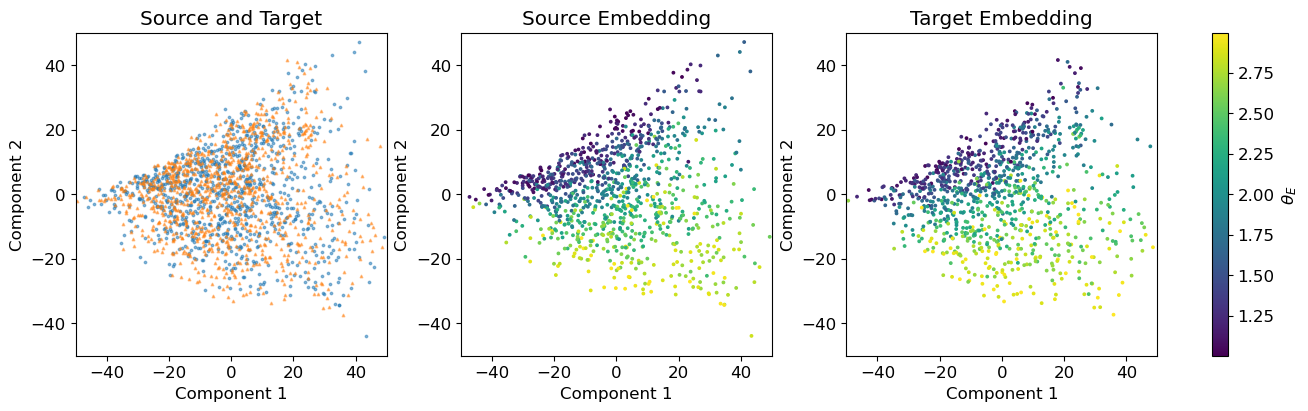

Saving Model MVE... Done.

Epoch 100: 9.65s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0703
	Train Regression Loss: : 0.0157
	Train Mve Loss: : -0.2815
	Train R2 Score: : 0.9520
 Validation Statistics:
	Val Source Regression Loss: : 0.0169
	Val Target Regression Loss: : 0.0195
	Val Source R2 Score: : 0.9487
	Val Target R2 Score: : 0.9363
	Val Source Mve Loss: : -0.2617
	Val Target Mve Loss: : -0.2588

Epoch 101: 10.99s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0698
	Train Regression Loss: : 0.0161
	Train Mve Loss: : -0.2057
	Train R2 Score: : 0.9506
 Validation Statistics:
	Val Source Regression Loss: : 0.0173
	Val Target Regression Loss: : 0.0203
	Val Source R2 Score: : 0.9476
	Val Target R2 Score: : 0.9370
	Val Source Mve Loss: : -0.1747
	Val Target Mve Loss: : -0.1721

Epoch 102: 11.03s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0716
	Train Regression Loss: : 0.0153
	Train Mve Loss: : -0.17

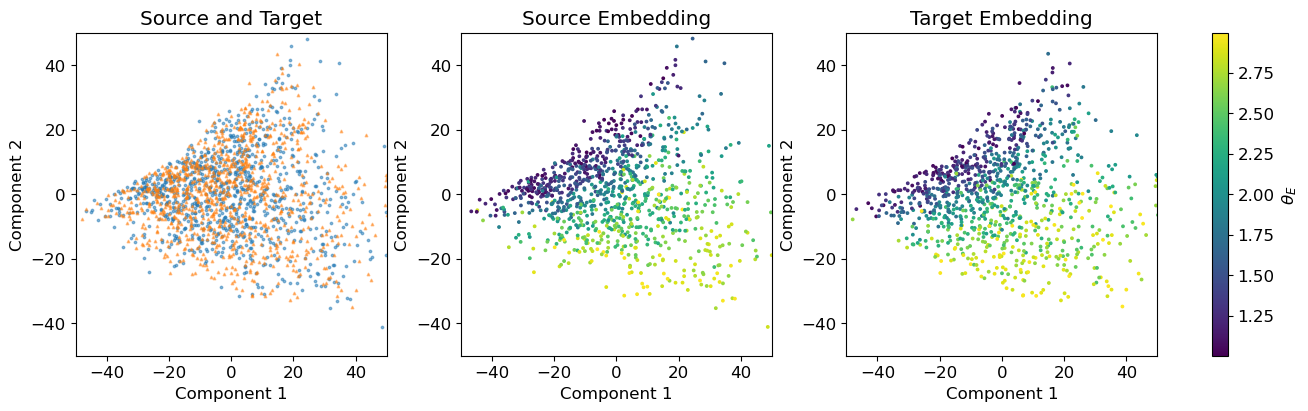


Epoch 120: 12.25s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0702
	Train Regression Loss: : 0.0125
	Train Mve Loss: : -0.1997
	Train R2 Score: : 0.9617
 Validation Statistics:
	Val Source Regression Loss: : 0.0133
	Val Target Regression Loss: : 0.0169
	Val Source R2 Score: : 0.9596
	Val Target R2 Score: : 0.9465
	Val Source Mve Loss: : -0.1325
	Val Target Mve Loss: : -0.1215

Epoch 121: 10.97s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0700
	Train Regression Loss: : 0.0127
	Train Mve Loss: : -0.3127
	Train R2 Score: : 0.9610
 Validation Statistics:
	Val Source Regression Loss: : 0.0127
	Val Target Regression Loss: : 0.0165
	Val Source R2 Score: : 0.9615
	Val Target R2 Score: : 0.9486
	Val Source Mve Loss: : -0.3364
	Val Target Mve Loss: : -0.3312
Saving Model MVE... Done.

Epoch 122: 11.07s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0698
	Train Regression Loss: : 0.0127
	Train Mve Loss: : -0.2

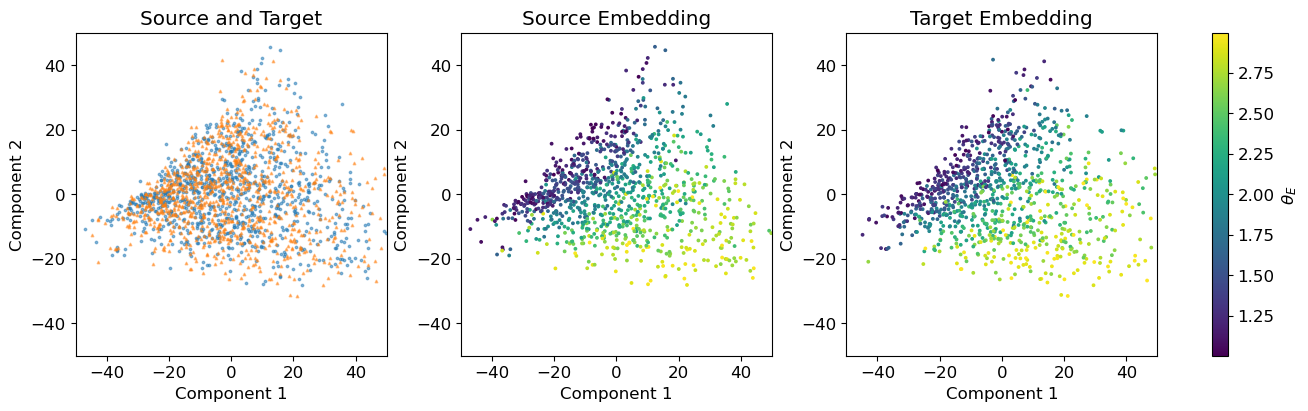

Saving Model... Done.

Epoch 140: 11.56s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0721
	Train Regression Loss: : 0.0106
	Train Mve Loss: : -0.3265
	Train R2 Score: : 0.9677
 Validation Statistics:
	Val Source Regression Loss: : 0.0107
	Val Target Regression Loss: : 0.0131
	Val Source R2 Score: : 0.9674
	Val Target R2 Score: : 0.9586
	Val Source Mve Loss: : -0.2835
	Val Target Mve Loss: : -0.2751
Saving Model... Done.

Epoch 141: 10.87s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0727
	Train Regression Loss: : 0.0103
	Train Mve Loss: : -0.2842
	Train R2 Score: : 0.9683
 Validation Statistics:
	Val Source Regression Loss: : 0.0117
	Val Target Regression Loss: : 0.0152
	Val Source R2 Score: : 0.9646
	Val Target R2 Score: : 0.9531
	Val Source Mve Loss: : -0.2472
	Val Target Mve Loss: : -0.2262

Epoch 142: 13.91s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0722
	Train Regression Loss: : 0.0106
	Trai

In [11]:
print("Beginning Training...")


for curr_epoch in range(stats['epoch_no'], stats['epoch_no'] + n_epoch):

        # Generate isomaps every 20 epochs
        if (curr_epoch % 20 == 0):
            print("Generating Isomap...")
            source_iso, target_iso = generate_isomaps(source_data, target_data, model)
            show_isomaps(source_iso, 
                         target_iso, 
                         isomap_source_label_sample, 
                         isomap_target_label_sample, 
                         save_mod_name, 
                         name = stats["epoch_no"], 
                         axlim = 50, save = True)

        # Save best models
        if (len(stats['val_target_r2_score']) > 0):
            
            # Save and overwrite model every best target R2
            if (stats['val_target_r2_score'][-1] > best_target_R2):
                print("Saving Model...", end = ' ')
                save_model(save_mod_name, model, optimizer, stats)
                best_target_R2 = stats['val_target_r2_score'][-1]
                print("Done.")
                
            # Save and overwrite model every best target MVE Loss
            if (stats['val_target_mve_loss'][-1] < best_mve_loss):
                print("Saving Model MVE...", end = ' ')
                mve_name = save_mod_name + "_mve"
                save_model(mve_name, model, optimizer, stats)
                best_mve_loss = stats['val_target_mve_loss'][-1]
                print("Done.")

        
        start_time = time.time()

        beta = beta_function(curr_epoch)
        da_weight = da_weight_function(curr_epoch)

        # Train, backpropagate
        vals = train_loop_mve(source_train_dataloader, 
                              target_train_dataloader, 
                              model,
                              regressor_loss_fn, 
                              da_loss_fn, 
                              optimizer,
                              da_weight, 
                              beta)

        # Test, validate metrics
        vals_validate = test_loop_mve(source_val_dataloader, 
                                      target_val_dataloader,
                                      model, 
                                      regressor_loss_fn, 
                                      beta)

        # Training Metrics
        stats['train_DA_loss'].append(vals[0])
        stats['train_regression_loss'].append(vals[1])
        stats['train_mve_loss'].append(vals[2])
        stats['train_r2_score'].append(vals[3])

        # Validation Metrics
        stats['val_source_regression_loss'].append(vals_validate[0])
        stats['val_target_regression_loss'].append(vals_validate[1])
        stats['val_source_r2_score'].append(vals_validate[2])
        stats['val_target_r2_score'].append(vals_validate[3])
        stats['val_source_mve_loss'].append(vals_validate[4])
        stats['val_target_mve_loss'].append(vals_validate[5])
        
        # Other Parameters
        stats['da_weight'].append(da_weight)
        stats['beta'].append(beta)
        stats['epoch_no'] += 1

        print_epoch_scores(stats, curr_epoch, time.time() - start_time)

In [12]:
# Saves the end result model after running for all stages, as well as the .json of stats

state = {
    'epoch': stats['epoch_no'],
    'state_dict': model.state_dict(),
    'optimizer': optimizer.state_dict(),
}
final_mod_name = save_mod_name + "_final"
torch.save(state, final_mod_name)
json.dump(stats, open(final_mod_name+'.json', 'w'))

## Visualize Results

In [13]:
# Loads a model for plotting/viz

viz_mod_name = final_mod_name # "models/start_code_test_4_final"
model.load_state_dict(torch.load(viz_mod_name)['state_dict'])
stats = json.load(open(viz_mod_name+'.json', 'r'))

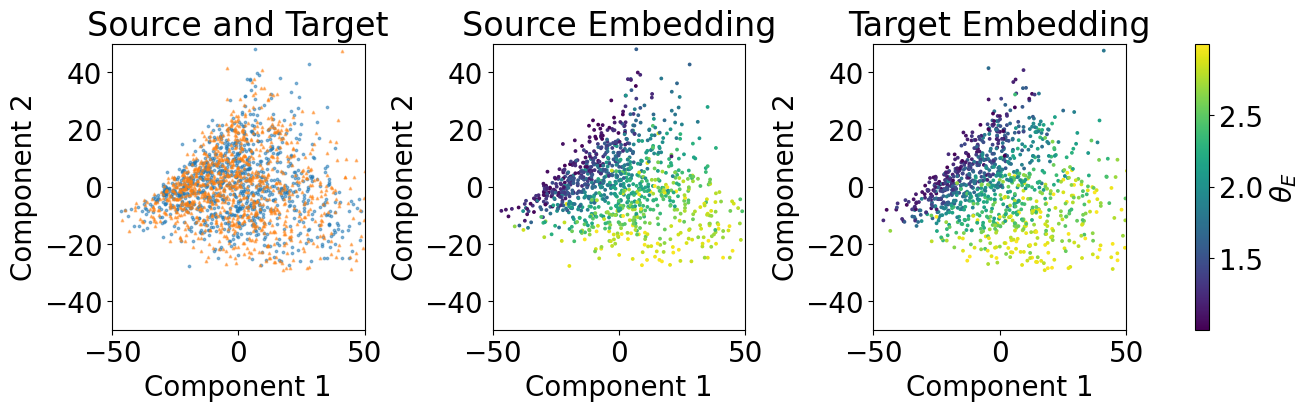

(<Figure size 1300x400 with 4 Axes>,
 array([<Axes: title={'center': 'Source and Target'}, xlabel='Component 1', ylabel='Component 2'>,
        <Axes: title={'center': 'Source Embedding'}, xlabel='Component 1', ylabel='Component 2'>,
        <Axes: title={'center': 'Target Embedding'}, xlabel='Component 1', ylabel='Component 2'>],
       dtype=object))

In [29]:
# Visualize isomaps 
trained_source_iso, trained_target_iso = generate_isomaps(source_data, target_data, model)
show_isomaps(trained_source_iso, trained_target_iso, isomap_source_label_sample, isomap_target_label_sample, viz_mod_name, axlim = 50)

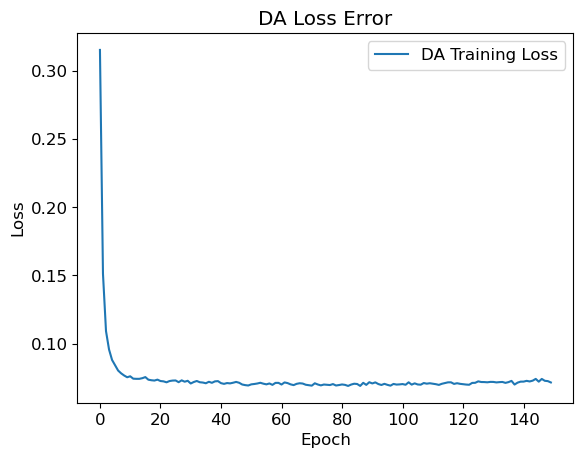

In [15]:
# DA Loss
fmt = lambda k: " ".join([i.capitalize() for i in k.split('_')])
eps = np.arange(stats["epoch_no"])
plt.title("DA Loss Error")
plt.plot(eps, stats['train_DA_loss'], label = "DA Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

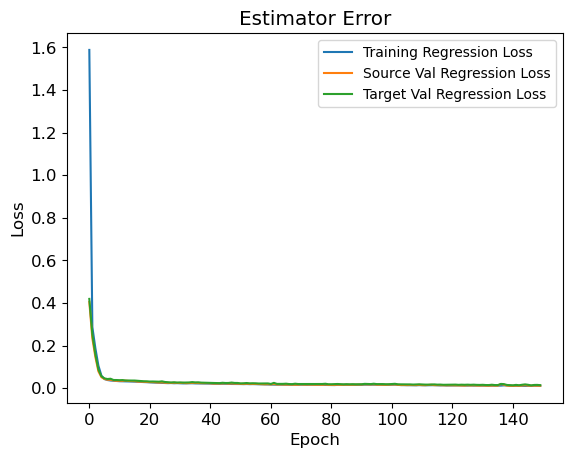

In [16]:
# Estimator / Regression
plt.title("Estimator Error")
plt.plot(eps, stats['train_regression_loss'], label = "Training Regression Loss")
plt.plot(eps, stats['val_source_regression_loss'], label = "Source Val Regression Loss")
plt.plot(eps, stats['val_target_regression_loss'], label = "Target Val Regression Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(fontsize = 'small')

(-1.0, 1.0)

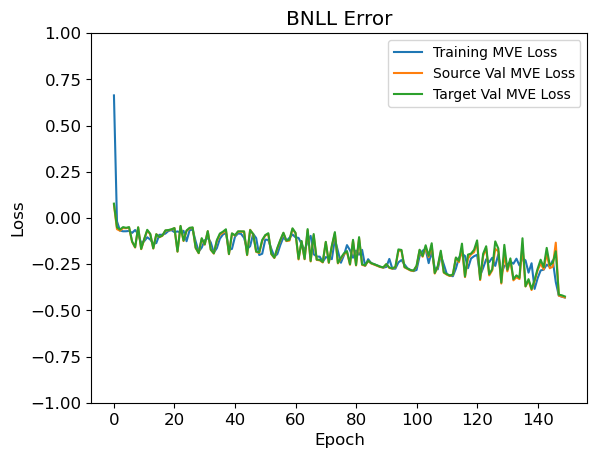

In [17]:
# BNLL for MVE
plt.title("BNLL Error")
plt.plot(eps, stats['train_mve_loss'], label = "Training MVE Loss")
plt.plot(eps, stats['val_source_mve_loss'], label = "Source Val MVE Loss")
plt.plot(eps, stats['val_target_mve_loss'], label = "Target Val MVE Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(fontsize = 'small')
plt.ylim(-1, 1)

(0.5, 1.0)

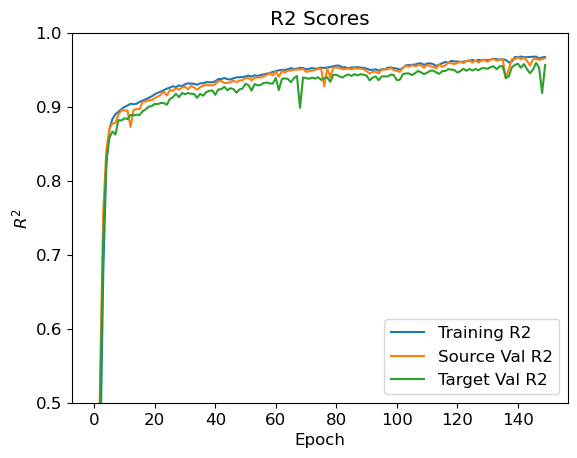

In [18]:
# R2 Scores
plt.title("R2 Scores")
plt.plot(eps, stats['train_r2_score'], label = "Training R2")
plt.plot(eps, stats['val_source_r2_score'], label = "Source Val R2")
plt.plot(eps, stats['val_target_r2_score'], label = "Target Val R2")
plt.xlabel("Epoch")
plt.ylabel("$R^2$")
plt.legend()
plt.ylim(0.5, 1)

In [19]:
# Test Source
var_preds_source = np.array([])
preds_source = np.array([])
true_source = np.array([])
lbnll_source = np.array([])
score_list = np.array([])

with torch.no_grad():
    for X, y in source_test_dataloader:
        X = X.float()
        pred, _ = model(X.cuda())
        preds_source = np.append(preds_source, pred[:, 0].cpu())
        var_preds_source = np.append(var_preds_source, pred[:, 1].cpu())
        true_source = np.append(true_source, y.cpu())
        score = r2_score(y.cpu(), pred[:, 0].cpu())
        score_list = np.append(score_list, score)
        lbnll_source = np.append(lbnll_source, loss_bnll(pred[:, 0].cpu(), pred[:, 1].cpu(), y, beta = 0.5))

score = np.mean(score_list)
print(f'Source R2 Score is {score:.4f}')

Source R2 Score is 0.9664


Text(0.5, 1.0, 'MMD | Source | R2: 0.966')

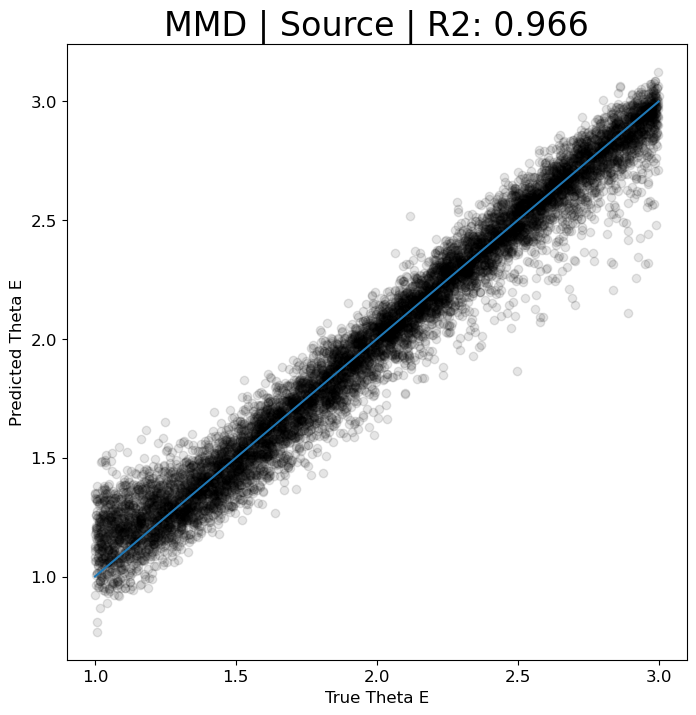

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(true_source, preds_source,  color='black', alpha = 0.1)
line = np.linspace(1, 3, 100)
plt.plot(line, line)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Predicted Theta E');
plt.rc('font', size=20)
plt.title('MMD | Source | R2: {0:.3f}'.format(np.mean(score_list)))

Text(0.5, 1.0, 'Uncertainty | Source | BNLL: -0.351')

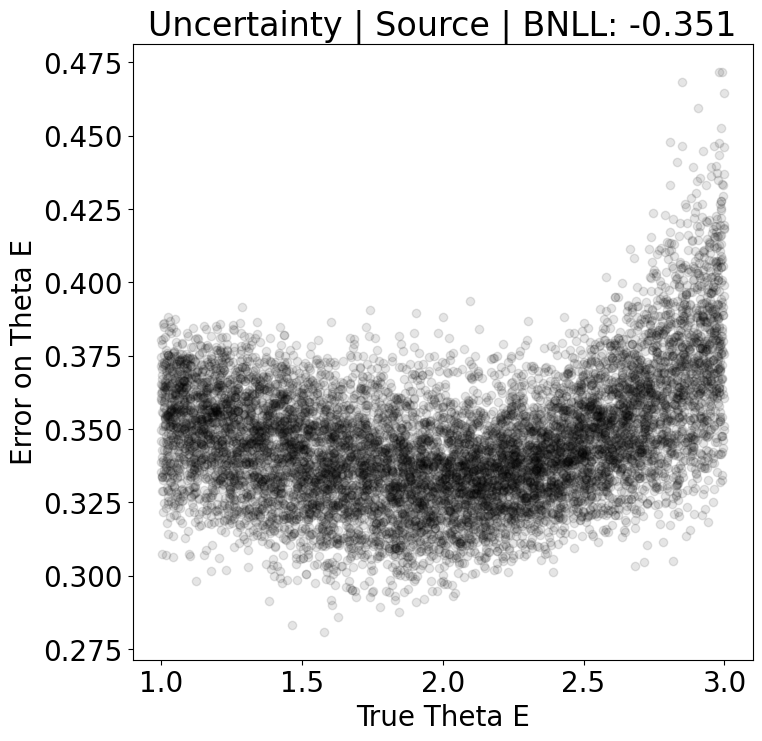

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(true_source, np.sqrt(var_preds_source),  color='black', alpha = 0.1)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Error on Theta E');
plt.rc('font', size=20)
plt.title('Uncertainty | Source | BNLL: {0:.3f}'.format(np.mean(lbnll_source)))

In [22]:
# Test target
preds_target = np.array([])
var_preds_target = np.array([])
true_target = np.array([])
score_list = np.array([])
lbnll_target = np.array([])


with torch.no_grad():
    for X, y in target_test_dataloader:
        X = X.float()
        pred, _ = model(X.cuda())
        preds_target = np.append(preds_target, pred[:, 0].cpu())
        var_preds_target = np.append(var_preds_target, pred[:, 1].cpu())
        true_target = np.append(true_target, y.cpu())
        score = r2_score(y.cpu(), pred[:, 0].cpu())
        score_list = np.append(score_list, score)
        lbnll_target = np.append(lbnll_target, loss_bnll(pred[:, 0].cpu(), pred[:, 1].cpu(), y, beta = 0.5))


score = np.mean(score_list)
print(f'Target R2 Score is {score:.4f}')

Target R2 Score is 0.9564


Text(0.5, 1.0, 'MMD | Target | R2: 0.956')

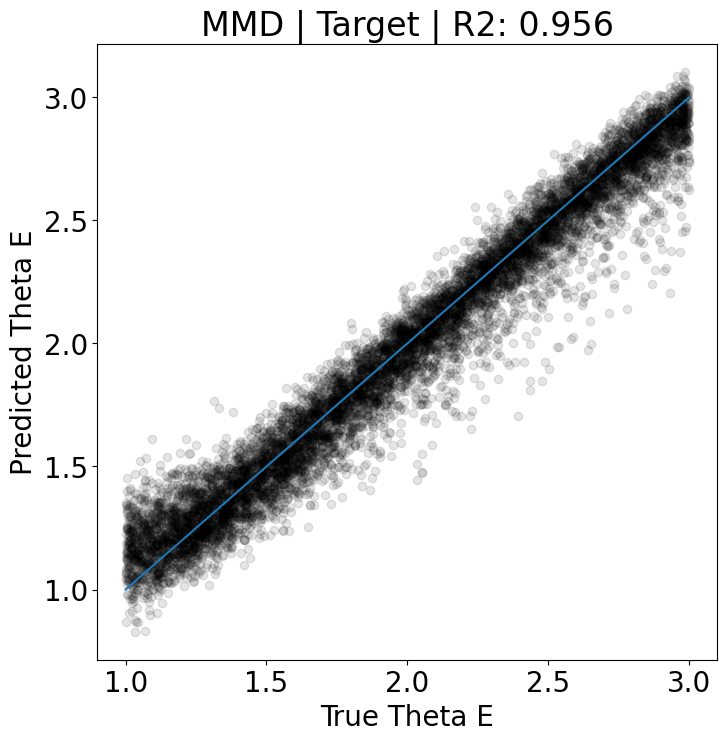

In [23]:
plt.figure(figsize=(8,8))
plt.scatter(true_target, preds_target,  color='black', alpha = 0.1)
line = np.linspace(1, 3, 100)
plt.plot(line, line)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Predicted Theta E');
plt.rc('font', size=20)
plt.title('MMD | Target | R2: {0:.3f}'.format(np.mean(score_list)))

Text(0.5, 1.0, 'MMD | Target | R2: 0.956')

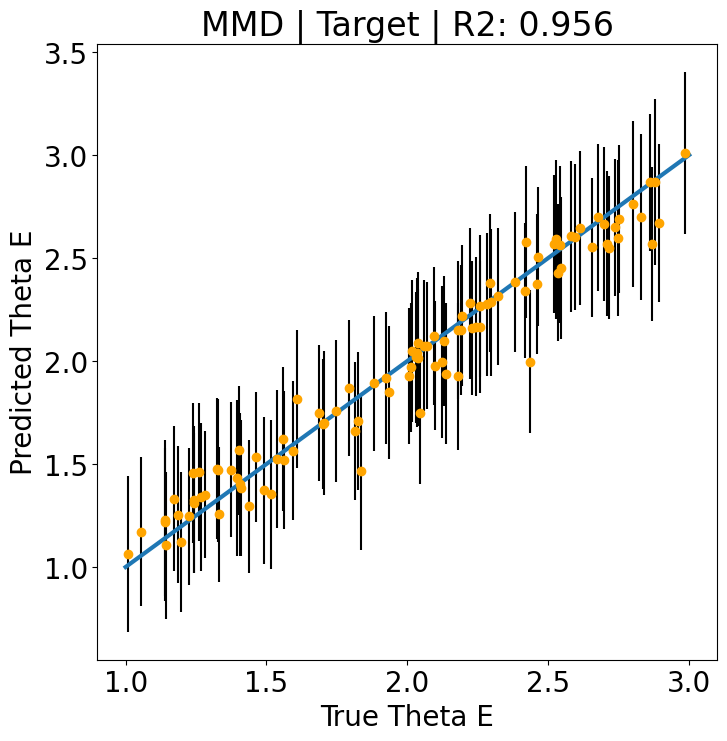

In [24]:
plt.figure(figsize=(8,8))
idx = np.random.choice(np.arange(len(true_target)), 100)
plt.errorbar(true_target[idx], preds_target[idx], yerr = np.sqrt(var_preds_target[idx]), fmt = 'o', color='orange', ecolor = 'k', alpha = 1)
line = np.linspace(1, 3, 100)
plt.plot(line, line, lw = 3)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Predicted Theta E');
plt.rc('font', size=20)
plt.title('MMD | Target | R2: {0:.3f}'.format(np.mean(score_list)))

Text(0.5, 1.0, 'Uncertainty | Target | BNLL: -0.346')

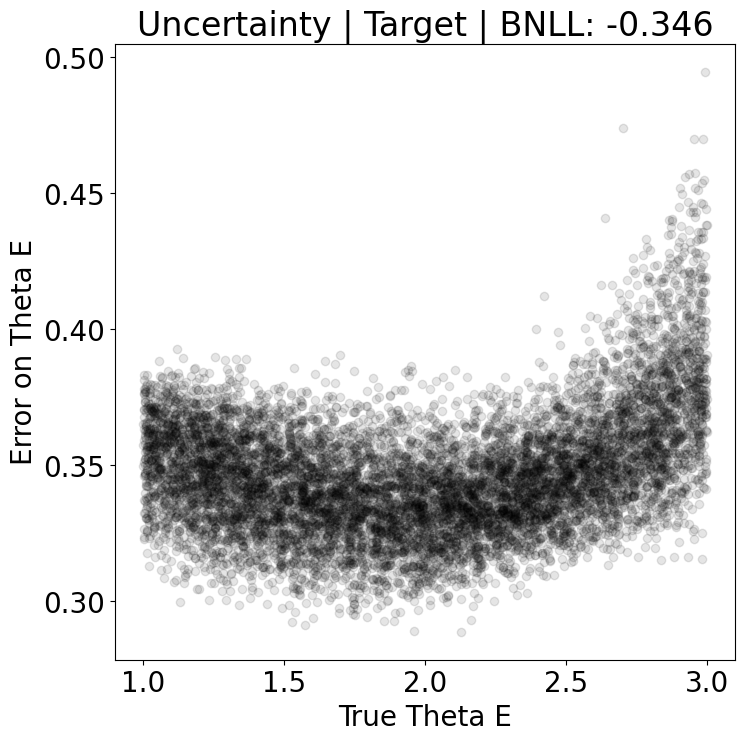

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(true_target, np.sqrt(var_preds_target),  color='black', alpha = 0.1)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Error on Theta E');
plt.rc('font', size=20)
plt.title('Uncertainty | Target | BNLL: {0:.3f}'.format(np.mean(lbnll_target)))

In [26]:
def sample_variance(obs, true):
    return np.std(obs - true) ** 2

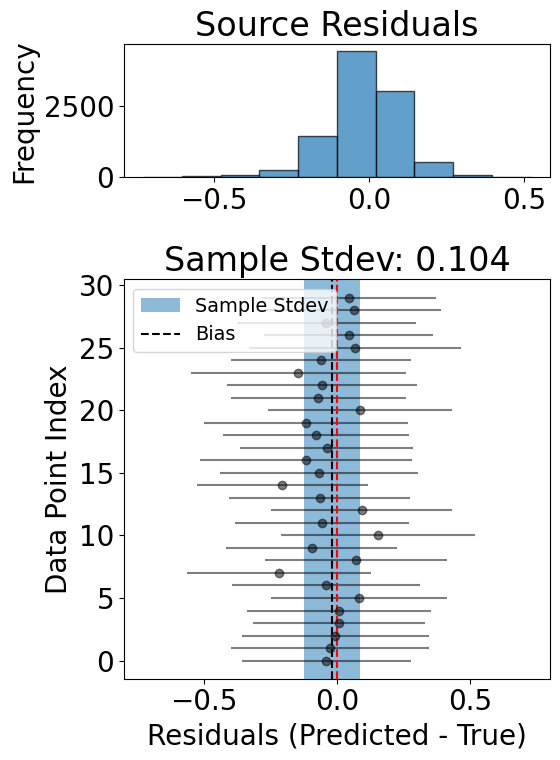

In [27]:
n_points = 30
rand_idx = np.random.choice(np.arange(len(preds_source)), n_points)
residuals = preds_source[rand_idx] - true_source[rand_idx]
resid_all = preds_target - true_target
errors = np.sqrt(var_preds_source[rand_idx])
sv = np.sqrt(sample_variance(preds_source, true_source))
mn = np.mean(resid_all)

# Create the figure and axes
fig, (ax_hist, ax_resid) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]}, figsize=(6, 8))



# Plot the histogram
ax_hist.hist(resid_all, bins=10, edgecolor='black', alpha=0.7)
ax_hist.set_title('Source Residuals')
ax_hist.set_ylabel('Frequency')

# Plot the residuals with error bars in the x-direction
ax_resid.errorbar(x=residuals, y=np.arange(n_points), xerr=errors, fmt='o', alpha=0.5, ecolor = 'k', color = 'k')
ax_resid.axvline(x=0, color='red', linestyle='--')
ax_resid.set_xlabel('Residuals (Predicted - True)')
ax_resid.set_ylabel('Data Point Index')
ax_resid.set_title('Sample Stdev: {0:.3f}'.format(sv))
ax_resid.axvspan(mn-sv, mn+sv, alpha = 0.5, label = "Sample Stdev")
ax_resid.axvline(mn, color = 'k', ls = '--', label = "Bias")
ax_resid.legend(loc = 'upper left', fontsize = 'x-small')

plt.xlim(-0.8, 0.8)

plt.tight_layout()
plt.show()

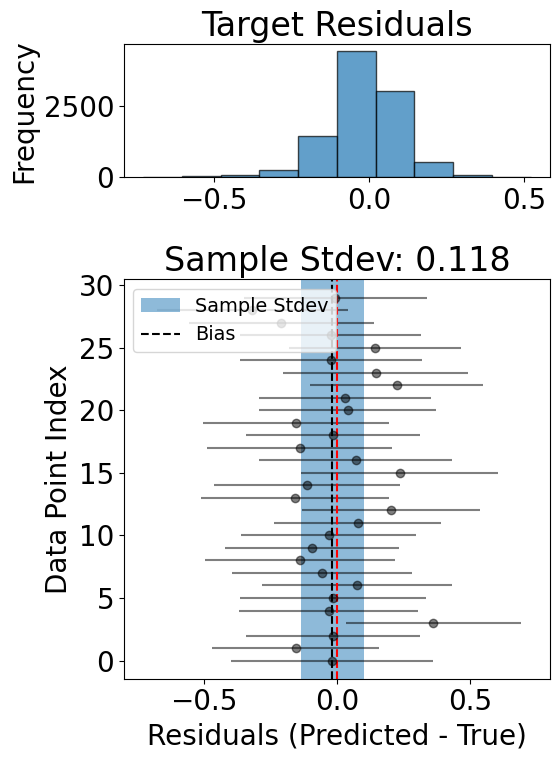

In [28]:
n_points = 30
rand_idx = np.random.choice(np.arange(len(preds_source)), n_points)
residuals = preds_target[rand_idx] - true_target[rand_idx]
resid_all = preds_target - true_target
errors = np.sqrt(var_preds_target[rand_idx])
sv = np.sqrt(sample_variance(preds_target, true_target))
mn = np.mean(resid_all)
# Create the figure and axes
fig, (ax_hist, ax_resid) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]}, figsize=(6, 8))



# Plot the histogram
ax_hist.hist(resid_all, bins=10, edgecolor='black', alpha=0.7)
ax_hist.set_title('Target Residuals')
ax_hist.set_ylabel('Frequency')

# Plot the residuals with error bars in the x-direction
ax_resid.errorbar(x=residuals, y=np.arange(n_points), xerr=errors, fmt='o', alpha=0.5, ecolor = 'k', color = 'k')
ax_resid.axvline(x=0, color='red', linestyle='--')
ax_resid.set_xlabel('Residuals (Predicted - True)')
ax_resid.set_ylabel('Data Point Index')
ax_resid.set_title('Sample Stdev: {0:.3f}'.format(sv))
ax_resid.axvspan(mn-sv, mn+sv, alpha = 0.5, label = "Sample Stdev")
ax_resid.axvline(mn, color = 'k', ls = '--', label = "Bias")
ax_resid.legend(loc = 'upper left', fontsize = 'x-small')

plt.xlim(-0.8, 0.8)

plt.tight_layout()
plt.show()